In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import cv2
import keras
%matplotlib inline

/Users/pagidoju/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#u_cols = ['id', '', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('wine reviews.csv')

In [3]:
users

,id,asins,brand,categories,dateAdded,dateUpdated,descriptions,dimension,ean,flavors,...,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,sourceURLs,upc,weight
0,AV13ClKCGV-KLJ3akN68,NaN,Gallo,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:11Z,2018-01-10T18:06:28Z,NaN,1.0 in x 1.0 in x 1.0 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,This a fantastic white wine for any occasion!,My Favorite White Wine,NaN,NaN,Bjh,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,4.9213E+11,1.0 lbs
1,AV13CsvW-jtxr-f38AQO,NaN,Fresh Craft Co.,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:42Z,2018-01-10T05:38:33Z,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...",4.25 in x 4.25 in x 5.25 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,"Tart, not sweet...very refreshing and delicious!",Yum!!,NaN,NaN,Wino,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,83120003441,2.45 lbs
2,AV13CVI_glJLPUi8O7Po,NaN,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,2018-01-10T05:38:31Z,NaN,3.3 in x 3.3 in x 11.79 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,I was given this wine so it was a delightful s...,A New Favorite!,NaN,NaN,Bama Mom,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,82896001453,3.09 lbs
3,AV13CVI_glJLPUi8O7Po,NaN,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,2018-01-10T05:38:31Z,NaN,3.3 in x 3.3 in x 11.79 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,This is a phenomenal wine and my new favorite ...,"Bold, Flavorful, Aromatic, Delicious",NaN,NaN,Av Dub,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,82896001453,3.09 lbs
4,AV13CYL4-jtxr-f37_-t,NaN,Wine Cube153,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:18Z,2018-01-10T18:06:29Z,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...",1.0 in x 1.0 in x 1.0 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,4 750ml bottles for the price of two With way ...,"Yum! Plus, Environmentally Friendly!",Overland Park,NaN,Chelseamay,NaN,https://redsky.target.com/groot-domain-api/v1/...,85200600465,1.0 lbs
5,AV6zq-akYSSHbkXwoEEj,NaN,Beck's Na,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-09-24T11:31:09Z,2018-01-10T22:32:40Z,NaN,1.0 in x 1.0 in x 1.0 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,I LOVE Becks NA. It tastes just like a regular...,Great Taste,NaN,NaN,Candib,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,82488127004,1.0 lbs
6,AV13CmDIglJLPUi8O7gb,NaN,Gallo,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:15Z,2018-01-10T22:54:36Z,"[{""dateSeen"":[""2017-12-14T07:05:00.000Z"",""2017...",1.0 in x 1.0 in x 1.0 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,This wine has a wonderful but strong aroma its...,Simply Wonderful,Athens,NaN,Littlebit,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,4.9213E+11,1.0 lbs
7,AV13CmDIglJLPUi8O7gb,NaN,Gallo,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:15Z,2018-01-10T22:54:36Z,"[{""dateSeen"":[""2017-12-14T07:05:00.000Z"",""2017...",1.0 in x 1.0 in x 1.0 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,I would give one more star if it came clean on...,A Sweet Red.,NaN,NaN,Condor9,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,4.9213E+11,1.0 lbs
8,AV6V57uYKZqtpbFMQNh6,NaN,California Roots,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-09-18T16:44:10Z,2018-01-10T18:06:27Z,"[{""dateSeen"":[""2017-12-16T09:19:00.000Z"",""2017...",3.06 in x 3.06 in x 12.34 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,Delicious and very affordable,NaN,NaN,NaN,Proberts43,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,85200028856,2.65 lbs
9,AV13CVPUglJLPUi8O7Pw,NaN,Charles Charles,"Food & Beverage,Beverages,Wine, Bee

In [4]:
newDf = users.loc[0:100,['brand','categories','dateAdded','reviews.title','reviews.rating']]
newDf

,brand,categories,dateAdded,reviews.title,reviews.rating
0,Gallo,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:11Z,My Favorite White Wine,5.0
1,Fresh Craft Co.,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:42Z,Yum!!,5.0
2,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,A New Favorite!,5.0
3,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,"Bold, Flavorful, Aromatic, Delicious",5.0
4,Wine Cube153,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:18Z,"Yum! Plus, Environmentally Friendly!",5.0
5,Beck's Na,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-09-24T11:31:09Z,Great Taste,5.0
6,Gallo,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:15Z,Simply Wonderful,3.0
7,Gallo,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:15Z,A Sweet Red.,2.0
8,California Roots,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-09-18T16:44:10Z,NaN,5.0
9,Charles Charles,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:06Z,Charles & Charles Red Blend,5.0


In [5]:
newDf.dropna()
newDf

,brand,categories,dateAdded,reviews.title,reviews.rating
0,Gallo,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:11Z,My Favorite White Wine,5.0
1,Fresh Craft Co.,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:42Z,Yum!!,5.0
2,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,A New Favorite!,5.0
3,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,"Bold, Flavorful, Aromatic, Delicious",5.0
4,Wine Cube153,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:18Z,"Yum! Plus, Environmentally Friendly!",5.0
5,Beck's Na,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-09-24T11:31:09Z,Great Taste,5.0
6,Gallo,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:15Z,Simply Wonderful,3.0
7,Gallo,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:15Z,A Sweet Red.,2.0
8,California Roots,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-09-18T16:44:10Z,NaN,5.0
9,Charles Charles,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:06Z,Charles & Charles Red Blend,5.0


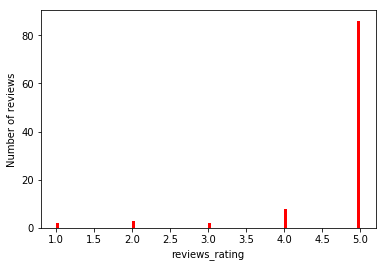

In [6]:
#newDf['log_review_ratings']=np.log(newDf['reviews.rating'].values)
plt.hist(newDf['reviews.rating'].values, bins= 100, color='red')
plt.xlabel('reviews_rating')
plt.ylabel('Number of reviews')
plt.show()

In [8]:
import sklearn
from sklearn.model_selection import train_test_split
feature_names = list(newDf.columns)
y = newDf['reviews.rating']
Xtr,Xtv,Ytr,Ytv = train_test_split(newDf[feature_names].values, y, test_size=0.2, random_state= 1999)

In [9]:
import xgboost as xgb
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(Xtr, Ytr)
# make predictions for test data
y_pred = model.predict(Xtv)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Ytv, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


ValueError: could not convert string to float: 'Bold, Flavorful, Aromatic, Delicious'